Name: Yerlan Negmetulla <br>
ID: 180107219

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

#### Load data

In [2]:
mat = scipy.io.loadmat('ex7data1.mat')
features = mat['X']

#### Plot data

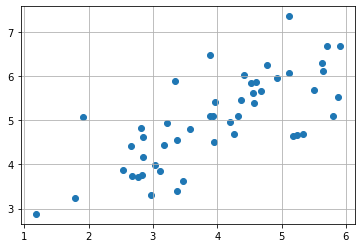

In [3]:
plt.scatter(features[:, 0], features[:, 1])
plt.grid()
plt.show()

### Write your own PCA algorithm

You need to find two principal components.
You can use linear algebra libraries

If you are importing the PCA from sklearn, you get only 50%

In [4]:
def pca(features_std, n_components):
    U, S, V = np.linalg.svd(features_std, full_matrices=False)
    max_abs_cols = np.argmax(np.abs(U), axis=0)
    signs = np.sign(U[max_abs_cols, range(U.shape[1])])
    U *= signs
    V *= signs[:, np.newaxis]

    eigen_vecs = V
    eigen_vals = (S ** 2) / (features_std.shape[0] - 1)

    sorted_idx = eigen_vals.argsort()[::-1]
    sorted_eigen_vecs = eigen_vecs[:, sorted_idx]
    sorted_eigen_vals = eigen_vals[sorted_idx]

    sorted_eigen_vecs_subset = sorted_eigen_vecs[:, :n_components].T
    sorted_eigen_vals_subset = sorted_eigen_vals[:n_components]

    return sorted_eigen_vals_subset, sorted_eigen_vecs_subset

n_components = 2
features_std = features - features.mean(axis=0)

sorted_eigen_vals_subset, sorted_eigen_vecs_subset = pca(features_std, n_components)
features_reduced = features_std.dot(sorted_eigen_vecs_subset)
print(f"eigen values:\n{sorted_eigen_vals_subset}")
print(f"eigen vectors:\n{sorted_eigen_vecs_subset}")

eigen values:
[2.10987818 0.3135314 ]
eigen vectors:
[[-0.76908153 -0.63915068]
 [-0.63915068  0.76908153]]


Your tasks are to draw two PCs and find orthogonal projections from some point to a given PCs.

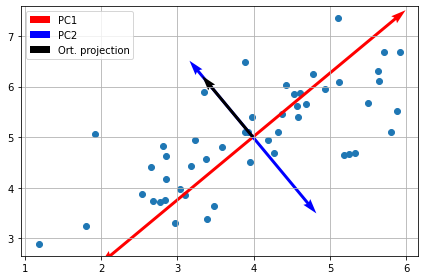

In [5]:
plt.scatter(features[:, 0], features[:, 1])
center = features.mean(axis=0)
for i, x in enumerate(sorted_eigen_vecs_subset.T):
    plt.quiver(*center,  x[0],  x[1], color='rb'[i], scale=[2,4][i], label=['PC1', 'PC2'][i])
    plt.quiver(*center, -x[0], -x[1], color='rb'[i], scale=[2,4][i])
plt.quiver(*center, sorted_eigen_vecs_subset.T[1][0], sorted_eigen_vecs_subset.T[1][1], color='k', scale=5, label='Ort. projection')
plt.grid()
plt.legend(loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

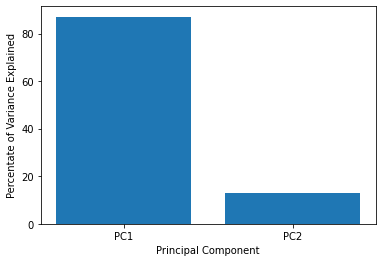

PC1: 87.06%;
PC2: 12.94%;


In [6]:
percent_variance = np.round(sorted_eigen_vals_subset/sorted_eigen_vals_subset.sum() * 100, decimals=2)
columns = ['PC1', 'PC2']
plt.bar(x=range(1,n_components+1), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.show()
t = np.round(sorted_eigen_vals_subset/sorted_eigen_vals_subset.sum() * 100, decimals=2)
print(f"PC1: {t[0]}%;\nPC2: {t[1]}%;")